# Predict if a person has heart disease or not

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
Rwtestset = pd.read_csv('Realworldtestset.csv')
Rwtestset

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,type
0,223,53,1,4,123,282,0,0,95,1,2.0,2,2.0,7.0,0
1,74,44,1,4,110,197,0,2,177,0,0.0,1,1.0,3.0,1
2,236,56,1,4,130,283,1,2,103,1,1.6,3,0.0,7.0,2
3,126,56,0,4,200,288,1,2,133,1,4.0,3,2.0,7.0,3
4,264,61,1,4,138,166,0,2,125,1,3.6,2,1.0,3.0,4


In [101]:
data = pd.read_csv('Heartdiseases.csv')

In [102]:
df = data.copy(deep=True)

In [103]:
indices_to_drop = [223,74,236,126,264]
df.drop(indices_to_drop, inplace=True)

In [104]:
df.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,type
44,61,0,4,130,330,0,2,169,0,0.0,1,0.0,3.0,1
180,48,1,4,124,274,0,2,166,0,0.5,2,0.0,7.0,3
143,64,1,3,125,309,0,0,131,1,1.8,2,0.0,7.0,1
278,57,1,2,154,232,0,2,164,0,0.0,1,1.0,3.0,1
114,62,0,3,130,263,0,0,97,0,1.2,2,1.0,7.0,2
76,60,1,4,125,258,0,2,141,1,2.8,2,1.0,7.0,1
24,60,1,4,130,206,0,2,132,1,2.4,2,2.0,7.0,4
96,59,1,4,110,239,0,2,142,1,1.2,2,1.0,7.0,2
144,58,1,3,105,240,0,2,154,1,0.6,2,0.0,7.0,0
197,45,0,4,138,236,0,2,152,1,0.2,2,0.0,3.0,0


In [105]:
df.shape

(298, 14)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 298 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       298 non-null    int64  
 1   sex       298 non-null    int64  
 2   cp        298 non-null    int64  
 3   trestbps  298 non-null    int64  
 4   chol      298 non-null    int64  
 5   fbs       298 non-null    int64  
 6   restecg   298 non-null    int64  
 7   thalach   298 non-null    int64  
 8   exang     298 non-null    int64  
 9   oldpeak   298 non-null    float64
 10  slope     298 non-null    int64  
 11  ca        294 non-null    float64
 12  thal      296 non-null    float64
 13  type      298 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 34.9 KB


In [107]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,type
count,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,294.000000,296.000000,298.000000
mean,54.446309,0.677852,3.144295,131.546980,246.751678,0.144295,0.979866,149.993289,0.318792,1.019463,1.590604,0.663265,4.722973,0.909396
std,9.085016,0.468085,0.961892,17.240997,51.781840,0.351980,0.994732,22.562744,0.466792,1.144989,0.608729,0.937762,1.937396,1.212385
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.250000,0.000000,0.000000,136.250000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,55.500000,1.000000,3.000000,130.000000,240.500000,0.000000,0.000000,153.000000,0.000000,0.750000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,274.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,192.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


### About the columns

- age: Age of the individual (in years).
- sex: Gender of the individual (1 = male, 0 = female).
- cp: Chest pain type (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic).
- trestbps: Resting blood pressure (in mm Hg) when admitted to the hospital.
- chol: Serum cholesterol level (in mg/dL).
- fbs: Fasting blood sugar > 120 mg/dL (1 = true; 0 = false).
- restecg: Resting electrocardiographic results (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy).
- thalach: Maximum heart rate achieved.
- exang: Exercise-induced angina (1 = yes, 0 = no).
- oldpeak: ST depression induced by exercise relative to rest.
- slope: The slope of the peak exercise ST segment (1 = upsloping, 2 = flat, 3 = downsloping).
- ca: Number of major vessels (0-3) colored by fluoroscopy.
- thal: Thallium stress test result - a radioactive isotope often used in stress testing (3 = normal; 6 = fixed defect; 7 = reversible defect).
- type: Presence or absence of heart disease (1 = presence, 0 = absence).


In [149]:
df['ca'].unique()

array([0., 3., 2., 1.])

In [142]:
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,type
72,62,1,4,120,267,0,0,99,1,1.8,2,2.0,7.0,1
211,38,1,1,120,231,0,0,182,1,3.8,2,0.0,7.0,1
149,60,0,3,102,318,0,0,160,0,0.0,1,1.0,3.0,0
162,54,0,3,110,214,0,0,158,0,1.6,2,0.0,3.0,0
224,63,0,4,108,269,0,0,169,1,1.8,2,2.0,3.0,1


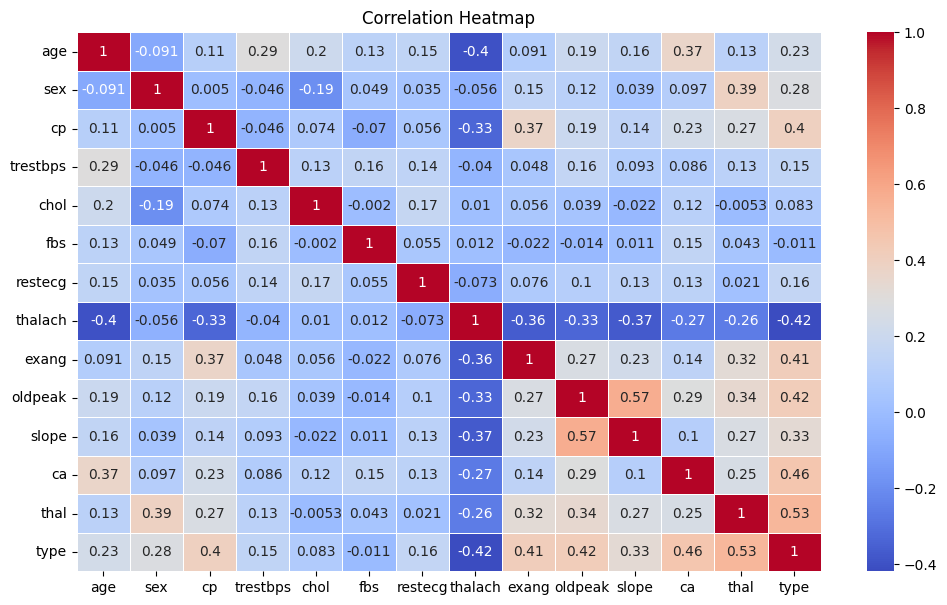

In [147]:


plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [108]:
mapping = {
     1 : 1,
     2 : 1,
     3 : 1,
     4 : 1,
     0 : 0
}

df['type'] = df["type"].map(mapping)


<Axes: xlabel='type', ylabel='count'>

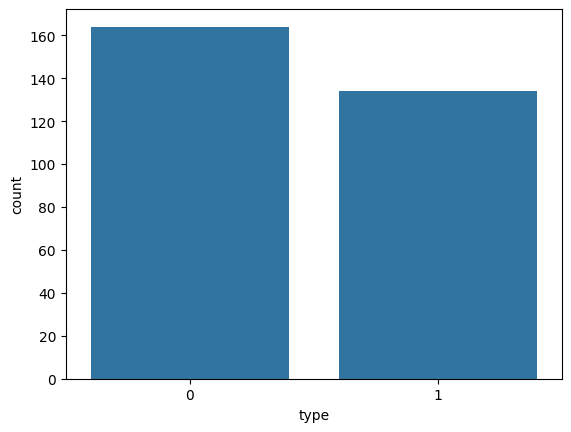

In [110]:
sns.barplot(data=df['type'].value_counts())

<Axes: xlabel='sex', ylabel='count'>

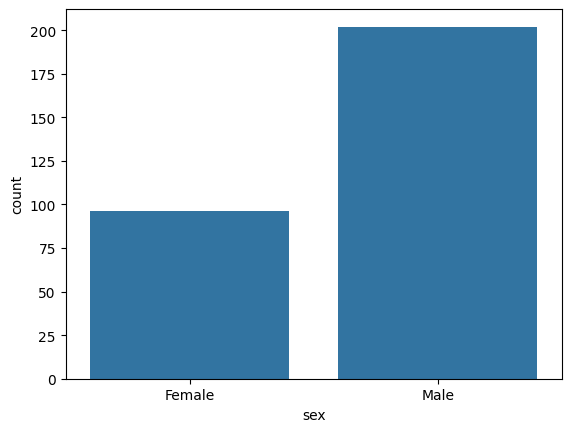

In [111]:
plt.xticks([0, 1],["Female", "Male"])
sns.barplot(df['sex'].value_counts())

In [112]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
type        0
dtype: int64

In [113]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
type        0
dtype: int64

In [114]:
df=df.dropna(axis=0)

In [115]:
df.shape

(292, 14)

In [116]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'type'],
      dtype='object')

<Axes: xlabel='thal', ylabel='Density'>

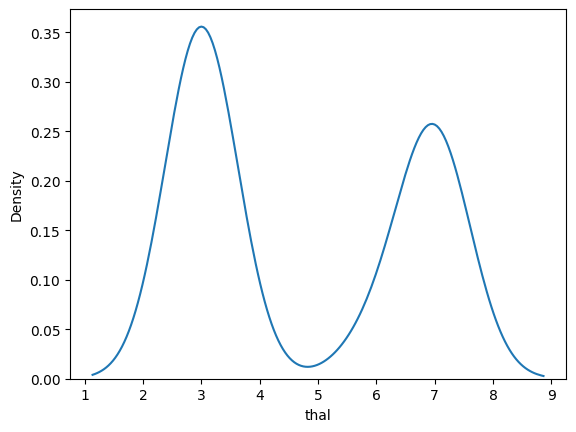

In [141]:
sns.kdeplot(df['thal'])

In [134]:
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,type
245,67,1,4,120,237,0,0,71,0,1.0,2,0.0,3.0,1
211,38,1,1,120,231,0,0,182,1,3.8,2,0.0,7.0,1
105,54,1,2,108,309,0,0,156,0,0.0,1,0.0,7.0,0
205,45,1,4,142,309,0,2,147,1,0.0,2,3.0,7.0,1
163,58,0,4,100,248,0,2,122,0,1.0,2,0.0,3.0,0


In [109]:
from sklearn.model_selection import train_test_split

X = df.drop('type', axis=1)  # Replace 'target' with the actual name of your target variable
y = df['type']

# Split the data into training (80%) and temporary (20%)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the temporary data into training (80%) and validation (20%)
X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)
